In [1]:
import selenium
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re


In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver .common .by import By
from selenium.webdriver.chrome.service import Service
import time

drama_list2 = []
browser = webdriver.Chrome("./chromedriver")
for j in range(2018,2023,1):
    url = 'https://ko.wikipedia.org/wiki/'+str(j)+'%EB%85%84_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%ED%85%94%EB%A0%88%EB%B9%84%EC%A0%84_%EB%93%9C%EB%9D%BC%EB%A7%88_%EB%AA%A9%EB%A1%9D'   # url 정보
    browser.get(url)
    time.sleep(1) #시간 조절
    for i in range(8,20,3):
        drama_list = browser.find_elements(By.CSS_SELECTOR, "  #mw-content-text > div.mw-parser-output > table:nth-child("+str(i)+")> tbody > tr")# table 안에 tr들을 가져옴

        #mw-content-text > div.mw-parser-output > table:nth-child(8)
        #td 순서 정리
        #1 - 번호, 2 - 주식이름, 3 - 주식 현재가, 4 - 주식 등락 가격, 5 - 주식 등락률
        #mw-content-text > div.mw-parser-output > table:nth-child(8)
        for drama in drama_list: #하나 하나 불러오면서
            try:
                drama_name = drama.find_element(By.CSS_SELECTOR, "td:nth-child(1)").text # 주식 이름
                drama_time = drama.find_element(By.CSS_SELECTOR, "td:nth-child(5)").text # 주식 현재가
                drama_list2.append([drama_name, drama_time])
                print(drama_name, drama_time)
            except:
                pass

<ipython-input-2-7e19bc5eebcc>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("./chromedriver")


《조선미인별전》 2
《문집》 1
《낫 플레이드(Not Played)》 1
《리턴》 34 (17)
《우리 집은 맛나 된장 맛나》 1
《하얀거탑》 40 (20)
《마더》 16
《파이터 최강순》 1
《라디오 로맨스》 16
《크로스》 16
《미스티》 16
《마지막 식사를 만드는 여자》 1
《으라차차 와이키키》 20
《파도야 파도야》 143
《철수씨와 02》 2
《키스 먼저 할까요》 40 (20)
《인형의 집》 103
《추리의 여왕 2》 16
《착한마녀전》 40 (20)
《작은 신의 아이들》 16
《데릴남편 오작두》 24
《대군 - 사랑을 그리다》 20
《라이브》 18
《위대한 유혹자》 32 (16)
《같이 살래요》 50
《손 꼭 잡고, 지는 석양을 바라보자》 32 (16)
《나의 아저씨》 16
《부잣집 아들》 100 (50)
《시를 잊은 그대에게》 16
《스위치 - 세상을 바꿔라》 32 (16)
《밥 잘 사주는 예쁜 누나》 16
《우리가 만난 기적》 18
《고품격 짝사랑》 5
《빨간 구두》 1
《슈츠》 16
《미스트리스》 12
《EXIT》 4 (2)
《세상에 없던 하루 5월 32일》 1
《미치겠다, 너땜에!》 4 (2)
《기름진 멜로》 38 (19)
《내일도 맑음》 121
《리치맨》 16
《무법 변호사》 16
《시크릿 마더》 32 (16)
《검법남녀》 32 (16)
《이리와 안아줘》 32 (16)
《단짠 오피스》 2
《멈추고 싶은 순간 : 어바웃 타임》 16
《미스 함무라비》 16
《훈남정음》 32 (16)
《스케치》 16
《이별이 떠났다》 40 (20)
《나도 엄마야》 124
《너도 인간이니?》 36 (18)
《김비서가 왜 그럴까》 16
《라이프 온 마스》 16
《비밀과 거짓말》 122
《당신의 하우스헬퍼》 32 (16)
《미스터 션샤인》 24
《투 제니》 2
《그녀로 말할 것 같으면》 40 (20)
《식샤를 합시다 3》 14
《라이프》 16
《사생결단 로맨스》 32 (16)
《서른이지만 열일곱입니다》 32 (16)
《끝까지 사랑》 104
《친애하는 판사님께》 32

In [3]:
import pandas as pd
columns = ['드라마 명', '회차'] # 컬럼 명을 지정해 줌
drama_data = pd.DataFrame(drama_list2, columns = columns) # drama_list를 데이터 프레임으로 변경

for i in range(len(drama_data['드라마 명'])):
    drama_data['드라마 명'].iloc[i] = drama_data['드라마 명'].iloc[i].strip('《》')
    drama_data['회차'].iloc[i] = drama_data['회차'].iloc[i].split(' ')[0]
    drama_data['회차'].iloc[i] = drama_data['회차'].iloc[i][0:3]

drama_data = drama_data.astype({'회차':'int'})
drama_data = drama_data.loc[(8 <= drama_data.회차) & (drama_data.회차 <= 40)]
drama_data

,드라마 명,회차
3,리턴,34
5,하얀거탑,40
6,마더,16
8,라디오 로맨스,16
9,크로스,16
...,...,...
375,배드 앤 크레이지,12
376,불가살,16
377,설강화,16
378,꽃 피면 달 생각하고,16


In [42]:
drama_data_real = drama_data.loc[:,'드라마 명']
drama_data_real
drama_data_test=drama_data.loc[149:,'드라마 명']
drama_data_test

149                  최고의 치킨
151       동네변호사 조들호 2: 죄와 벌
152                 왕이 된 남자
153                 왜그래 풍상씨
156                 봄이 오나 봄
157               로맨스는 별책부록
159                      바벨
161                  진심이 닿다
162                   리갈 하이
163             막돼먹은 영애씨 17
165                  눈이 부시게
166                     아이템
169      신비아파트 외전: 기억, 하리 2
170                    열혈사제
171               슬플 때 사랑한다
172                     빅이슈
173                      빙의
174              사이코메트리 그녀석
175                 닥터 프리즈너
177                      자백
178                      킬잇
179             으라차차 와이키키 2
180                    더 뱅커
181                 국민 여러분!
183                 아름다운 세상
184             특별근로감독관 조장풍
185                회사 가기 싫어
186                 그녀의 사생활
189                      이몽
190               초면에 사랑합니다
191                     어비스
192                   구해줘 2
193         보이스 3 - 공범들의 도시
194                   절대 그이
196               단, 하나의 사랑
197                 

In [47]:
browser = webdriver.Chrome("./chromedriver")
df=[]
for i in drama_data_test:
    url ="https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=드라마"+i
    browser.get(url)
    time.sleep(1)
    drama_search = browser.find_elements(By.CSS_SELECTOR, "#tvpColl > div.coll_cont")
    for drama_s in drama_search:
        
        #드라마의 제목일치시 크롤링 진행
        drama_title =  browser.find_element(By.CSS_SELECTOR,"#tvpColl > div.coll_cont > div > div.head_cont > span > a").text
        if drama_title == i:
            
            #드라마 요일
            drama_day_d =  browser.find_element(By.CSS_SELECTOR,"#tvpColl > div.coll_cont > div > div.head_cont > div > span:nth-child(3)").text

            #드라마 회차,방영시기
            create_list = browser.find_element(By.CSS_SELECTOR,"#tvpColl > div.coll_cont > div > div.head_cont > div > span:nth-child(4)").text
            cr = create_list.split(",")
            scene = cr[0]
            brocast_time = cr[1]
            
            #방송사
            brocast = browser.find_element(By.CSS_SELECTOR, "#tvpColl > div.coll_cont > div > div.head_cont > div > a").text

            #제작자:연출과 극본
            creator_list = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.info_cont > dl:nth-child(4) > dd").text
            for item in creator_list.split(", "):
                if "연출" in item:
                    direct = item.split("(")[0]
                elif "극본" in item:
                    scriptor = item.split("(")[0]
            
            #주연배우
            try:
                actor1 = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.wrap_col.castingList.lst > ul > li:nth-child(1) > span.sub_name ").text
            except:
                actor1 = ""
            try:
                actor2 = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.wrap_col.castingList.lst > ul > li:nth-child(2) > span.sub_name ").text
            except:
                actor2 = ""
            try:
                actor3 = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.wrap_col.castingList.lst > ul > li:nth-child(3) > span.sub_name ").text
            except:
                actor3 = ""
            try:
                actor4 = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.wrap_col.castingList.lst > ul > li:nth-child(4) > span.sub_name ").text
            except:
                actor4 = ""
            try:
                actor5 = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.wrap_col.castingList.lst > ul > li:nth-child(5) > span.sub_name ").text
            except:
                actor5 = ""
            #소개
            inproduce = browser.find_element(By.CSS_SELECTOR,"#tv_program > div.info_cont > dl:nth-child(3) > dd").text
            #이전작품의 제목과 최고평점
            try:
                before_url = browser.find_element(By.CSS_SELECTOR, "#tv_program > div.coll_etc > dl > dd > a:nth-child(1)")
                before_url.click()
                before_title= browser.find_element(By.CSS_SELECTOR,'#tvpColl > div.coll_cont > div > div.head_cont > span > a').text
                before_max_rating = browser.find_element(By.CSS_SELECTOR,'#tv_program > div.info_cont > dl:nth-child(5) > dd > span:nth-child(3)').text
                #이전페이지로 가기
                browser.back()
                time.sleep(1)
            except:
                before_title = ""
                before_max_rating = ""   
            """시청률 파트입니다."""
            try:
                tv_rating_url = browser.find_element(By.CSS_SELECTOR, "#tab_content > div.tab_nav > ul > li:nth-child(4) > a")
            except:
                break
            if tv_rating_url.text != "시청률":
                break
            else:
                tv_rating_url.click()
                time.sleep(1)
                try:
                    view_more = browser.find_element(By.CSS_SELECTOR, "#tv_rating > div.extend_comp.extend_more > a")
                    view_more.click()
                    view_more = browser.find_element(By.CSS_SELECTOR, "#tv_rating > div.wrap_rank > div.extend_comp.extend_basic > a")
                    view_more.click()
                except:
                    break

                time.sleep(2)

                tv_rating_list = []
                tv_rank_list = []
                rating_lines = browser.find_elements(By.CSS_SELECTOR, "#tv_rating > div.wrap_rank > table > tbody > tr ")
                try:
                    rating_line_header = browser.find_element(By.CSS_SELECTOR, " tr > th:nth-child(3)").text
                    rating_line_header2 = browser.find_element(By.CSS_SELECTOR, "tr > th:nth-child(4)").text
                    print(rating_line_header,rating_line_header2)
                    if rating_line_header != "시청률" or rating_line_header2 !="장르별순위":
                        break
                except:
                    break
                for rating_line in rating_lines:
                    rating = rating_line.find_element(By.CSS_SELECTOR, "td:nth-child(3)").text
                    rank = rating_line.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text
                    rating_string = rating.replace("%", "")
                    rating_float = float(rating_string)
                    tv_rating_list.append(rating_float)

                    match = re.search(r'드라마 (\d+)위', rank)

                    if match:
                        rank_string = match.group(1)
                        rank_int = int(rank_string)
                        tv_rank_list.append(rank_int)
                mean_rank = sum(tv_rank_list)/len(tv_rank_list)    # 평균 순위
                max_rating = max(tv_rating_list)                   # 최고 시청률
                mean_rating = sum(tv_rating_list)/len(tv_rating_list) #평균 시청률





                browser.back()

            
            """ OST 파트입니다. """
            ost_url = browser.find_element(By.CSS_SELECTOR, "#tab_content > div.tab_nav > ul > li.lst > a")
            if ost_url.text != "OST":
                break
            ost_url.click()
            try:
                view_more = browser.find_element(By.CSS_SELECTOR,"#tv_ost > div.extend_comp.extend_more > a")
                view_more.click()
            except:
                pass
            ost_list = browser.find_elements(By.CSS_SELECTOR, "#tv_ost > div > ul > li > div.wrap_thumb > a")
            score_list = []
            for ost in ost_list:
                ost.click()
                browser.switch_to.window(browser.window_handles[1])
                time.sleep(1)
                like_count = browser.find_element(By.CSS_SELECTOR, "#d_like_count").text
                like_count_string = like_count.replace(",", "")
                like_count_int = int(like_count_string)
                #print(like_count_int)
                score_list.append(like_count_int)
                browser.close()
                browser.switch_to.window(browser.window_handles[0])
            best_like_count = max(score_list) # 음악 차트 좋아요 가장 많은 것

                
            print('제목',drama_title,'방송사:',brocast,'드라마 요일:', drama_day_d, '회차', scene,'방영시기',brocast_time,'연출:',direct,'극본:',scriptor)
            df.append([drama_title,brocast ,drama_day_d, scene, brocast_time, direct,scriptor,actor1,actor2,actor3,actor4,actor5,before_title,before_max_rating,
                      mean_rank,max_rating,mean_rating,best_like_count,inproduce])
            #browser.close() # 탭 닫기
        elif drama_title != i:
            continue
            
    

<ipython-input-47-b5371fed5a31>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("./chromedriver")


시청률
시청률
시청률 장르별순위
제목 왕이 된 남자 방송사: tvN 드라마 요일: 월, 화 회차 16부작 방영시기  2019.1.7~3.4 연출: 김희원 극본: 신하은
시청률
시청률 장르별순위
제목 왜그래 풍상씨 방송사: KBS2 드라마 요일: 수, 목 회차 40부작 방영시기  2019.1.9~3.14 연출: 진형욱 극본: 문영남
시청률
시청률 장르별순위
제목 봄이 오나 봄 방송사: MBC 드라마 요일: 수, 목 회차 32부작 방영시기  2019.1.23~3.21 연출: 박승우 극본: 이혜선
시청률
시청률 장르별순위
제목 로맨스는 별책부록 방송사: tvN 드라마 요일: 토, 일 회차 16부작 방영시기  2019.1.26~3.17 연출: 김나영 극본: 정현정
시청률
시청률 장르별순위
제목 바벨 방송사: TV조선 드라마 요일: 토, 일 회차 16부작 방영시기  2019.1.27~3.24 연출: 윤성식 극본: 박상욱
시청률
시청률 장르별순위
제목 진심이 닿다 방송사: tvN 드라마 요일: 수, 목 회차 16부작 방영시기  2019.2.6~3.28 연출: 박준화 극본: 최보림
시청률
시청률 장르별순위
제목 눈이 부시게 방송사: JTBC 드라마 요일: 월, 화 회차 12부작 방영시기  2019.2.11~3.19 연출: 김석윤 극본: 김수진
시청률
시청률 장르별순위
제목 아이템 방송사: MBC 드라마 요일: 월, 화 회차 32부작 방영시기  2019.2.11~4.2 연출: 김성욱 극본: 정이도
시청률
시청률 장르별순위
제목 열혈사제 방송사: SBS 드라마 요일: 금, 토 회차 40부작 방영시기  2019.2.15~4.20 연출: 이명우 극본: 박재범
시청률
시청률 장르별순위
제목 슬플 때 사랑한다 방송사: MBC 드라마 요일: 토 회차 40부작 방영시기  2019.2.23~4.27 연출: 유범상 극본: 송정림
시청률
시청률 장르별순위
제목 빅이슈 방송사: SBS 드라마 요일: 수, 목 회차 32부작 방영시기  2019.3.6~5.2 연출: 이동훈 극본: 장혁린
시청률
시

시청률
시청률 장르별순위
제목 야식남녀 방송사: JTBC 드라마 요일: 월, 화 회차 12부작 방영시기  2020.5.25~6.30 연출: 송지원 극본: 박승혜
시청률
시청률 장르별순위
제목 저녁 같이 드실래요? 방송사: MBC 드라마 요일: 월, 화 회차 32부작 방영시기  2020.5.25~7.14 연출: 박봉섭 극본: 이수하
시청률
시청률 장르별순위
제목 (아는 건 별로 없지만) 가족입니다 방송사: tvN 드라마 요일: 월, 화 회차 16부작 방영시기  2020.6.1~7.21 연출: 권영일 극본: 김은정
시청률
시청률 장르별순위
제목 편의점 샛별이 방송사: SBS 드라마 요일: 금, 토 회차 16부작 방영시기  2020.6.19~8.8 연출: 이명우 극본: 손근주
시청률
시청률 장르별순위
제목 사이코지만 괜찮아 방송사: tvN 드라마 요일: 토, 일 회차 16부작 방영시기  2020.6.20~8.9 연출: 박신우 극본: 조용
시청률
시청률 장르별순위
제목 출사표 방송사: KBS2 드라마 요일: 수, 목 회차 16부작 방영시기  2020.7.1~8.20 연출: 최연수 극본: 문현경
시청률
시청률 장르별순위
제목 그놈이 그놈이다 방송사: KBS2 드라마 요일: 월, 화 회차 16부작 방영시기  2020.7.6~9.1 연출: 이호 극본: 이은영
시청률
시청률 장르별순위
제목 우리, 사랑했을까 방송사: JTBC 드라마 요일: 수, 목 회차 16부작 방영시기  2020.7.8~9.2 연출: 김도형 극본: 이승진
시청률
시청률 장르별순위
제목 우아한 친구들 방송사: JTBC 드라마 요일: 금, 토 회차 17부작 방영시기  2020.7.10~9.5 연출: 박소연 극본: 김경선
시청률
시청률 장르별순위
제목 트레인 방송사: OCN 드라마 요일: 토, 일 회차 12부작 방영시기  2020.7.11~8.16 연출: 이승훈 극본: 박가연
시청률
시청률
시청률 장르별순위
제목 악의 꽃 방송사: tvN 드라마 요일: 수, 목 회차 16부작 방영시기  2020.7.29~9.23

In [48]:
columns = ['제목','방송사','방영요일','회차','방영시기','연출','극본','배우1','배우2','배우3','배우4','배우5','이전작품',
           '이전작 최고 시청률','드라마 평균 순위','최고 시청률','평균 시청률','ost종아요수','드라마 소개']
pd_data = pd.DataFrame(df, columns=columns)
#pd_data['드라마 리스트'].split('\n')
#pd_data['창작자 리스트'].split('\n')
pd_data.to_csv("dd5.csv", encoding='utf-8-sig')
pd_data

,제목,방송사,방영요일,회차,방영시기,연출,극본,배우1,배우2,배우3,배우4,배우5,이전작품,이전작 최고 시청률,드라마 평균 순위,최고 시청률,평균 시청률,ost종아요수,드라마 소개
0,왕이 된 남자,tvN,"월, 화",16부작,2019.1.7~3.4,김희원,신하은,여진구,여진구,이세영,김상경,정혜영,사이코메트리 그녀석,2.794%,1.000000,10.851,8.409562,15022,"잦은 변란과 왕위를 둘러싼 권력 다툼에 혼란이 극에 달한 조선 중기, 임금 ‘이헌’..."
1,왜그래 풍상씨,KBS2,"수, 목",40부작,2019.1.9~3.14,진형욱,문영남,유준상,오지호,전혜빈,이시영,차서원,닥터 프리즈너,15.8%,4.725000,22.700,12.187500,5659,동생 바보로 살아온 중년남자 풍상씨와 등골 브레이커 동생들의 아드레날린 솟구치는 일...
2,봄이 오나 봄,MBC,"수, 목",32부작,2019.1.23~3.21,박승우,이혜선,이유리,엄지원,이종혁,최병모,안세하,더 뱅커,7%,12.218750,4.300,2.506250,2283,자신밖에 모르는 앵커와 가족에게 헌신하는 배우 출신 국회의원 사모님의 몸이 바뀌면서...
3,로맨스는 별책부록,tvN,"토, 일",16부작,2019.1.26~3.17,김나영,정현정,이나영,이종석,정유진,위하준,김태우,자백,6.275%,1.000000,6.651,5.107533,41892,"‘책을 만들었는데, 로맨스가 따라왔다?’ 책을 읽지 않는 세상에서 책을 만드는 사람..."
4,바벨,TV조선,"토, 일",16부작,2019.1.27~3.24,윤성식,박상욱,박시후,장희진,김해숙,장신영,김지훈,,,1.250000,3.713,3.160000,1608,복수를 위해 인생을 내던진 검사와 재벌과의 결혼으로 인해 인생이 망가진 여배우의 사...
5,진심이 닿다,tvN,"수, 목",16부작,2019.2.6~3.28,박준화,최보림,유인나,이동욱,이상우,손성윤,오정세,그녀의 사생활,3.085%,1.000000,4.736,3.969375,50996,"어느 날, 드라마처럼 로펌에 뚝 떨어진 대한민국 대표 여배우 오윤서가 완벽주의 변호..."
6,눈이 부시게,JTBC,"월, 화",12부작,2019.2.11~3.19,김석윤,김수진,김혜자,한지민,남주혁,손호준,안내상,으라차차 와이키키 2,2.118%,1.000000,9.731,6.272333,4128,주어진 시간을 다 써보지도 못하고 잃어버린 여자와 누구보다 찬란한 순간을 스스로 내...
7,아이템,MBC,"월, 화",32부작,2019.2.11~4.2,김성욱,정이도,주지훈,진세연,김강우,김유리,박원상,특별근로감독관 조장풍,8.7%,10.290323,4.900,3.712903,3542,소중한 사람을 간절하게 지키기 위해 특별한 초능력을 가진 물건들을 둘러싼 음모와 비...
8,열혈사제,SBS,"금, 토",40부작,2019.2.15~4.20,이명우,박재범,김남길,김성균,이하늬,고준,금새록,녹두꽃,11.5%,3.300000,22.000,16.115000,6932,분노조절장애 가톨릭 사제와 구담경찰서 대표 형사가 늙은 신부 살인사건으로 만나 어영...
9,슬플 때 사랑한다,MBC,토,40부작,2019.2.23~4.27,유범상,송정림,지현우,박한별,류수영,왕빛나,박한별,,,6.205128,13.000,9.746154,1000,"'쫓기는 여자, 쫓는 남자, 숨겨준 남자'. 사랑은 흔하나 진짜 사랑은 힘든 시대!..."


In [10]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [72]:
drama_data

,드라마 명,회차
3,리턴,34
5,하얀거탑,40
6,마더,16
8,라디오 로맨스,16
9,크로스,16
10,미스티,16
12,으라차차 와이키키,20
15,키스 먼저 할까요,40
17,추리의 여왕 2,16
18,착한마녀전,40


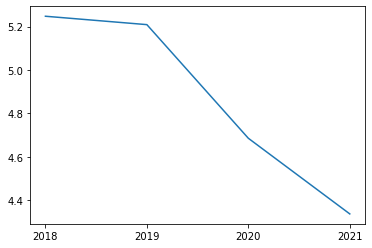

     Unnamed: 0           제목   방송사  방영요일    회차                   방영시기     연출  \
0             0           리턴   SBS  수, 목  34부작         2018.1.17~3.22    주동민   
1             1         하얀거탑   MBC  토, 일  20부작          2007.1.6~3.11    안판석   
2             2           마더   tvN  수, 목  16부작         2018.1.24~3.15    윤현기   
3             3      라디오 로맨스  KBS2  월, 화  16부작         2018.1.29~3.20    황승기   
4             4          크로스   tvN  월, 화  16부작         2018.1.29~3.20    신용휘   
..          ...          ...   ...   ...   ...                    ...    ...   
198         198           엉클  TV조선  토, 일  16부작   2021.12.11~2022.1.30    성도준   
199         199    배드 앤 크레이지   tvN  금, 토  12부작   2021.12.17~2022.1.28    유선동   
200         200          불가살   tvN  토, 일  16부작    2021.12.18~2022.2.6  함승훈 외   
201         201  꽃 피면 달 생각하고  KBS2  월, 화  16부작   2021.12.20~2022.2.22    황인혁   
202         202        한 사람만  JTBC  월, 화  16부작    2021.12.20~2022.2.8    오현종   

      극본  배우1  배우2  배우3  배우4  배우5      

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.read_csv("C:/Users/parkh/git_tlsgudcks/dd2.csv")
df2018 = df2.loc[:69,'평균 시청률']
df2019 = df2.loc[69:134,'평균 시청률']
df2020 = df2.loc[134:177,'평균 시청률']
df2021 = df2.loc[177:,'평균 시청률']
df_2018 = sum(df2018)/len(df2018)
df_2019 = sum(df2019)/len(df2019)
df_2020 = sum(df2020)/len(df2020)
df_2021 = sum(df2021)/len(df2021)

rate = [df_2018,df_2019,df_2020,df_2021]
year = [2018, 2019, 2020, 2021]
plt.xticks(year)
plt.plot(year, rate)
plt.show()
print(df2)

In [50]:
import selenium
from selenium import webdriver
from selenium.webdriver .common .by import By
from selenium.webdriver.chrome.service import Service
import time


browser = webdriver.Chrome("./chromedriver")
df4=[]
for i in title:
    url ="https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=드라마 "+i+" 전작"
    browser.get(url)
    time.sleep(1)
    #전작 제목 
    try:
        before_title_b =  browser.find_element(By.CSS_SELECTOR," #main_pack > div.sc_new._kgs_broadcast.cs_common_module.case_normal > div.cm_top_wrap._sticky._custom_select._header > div.title_area._title_area > h2 > span > strong ").text
        #전작 시청률
        before_rating_b =  browser.find_element(By.CSS_SELECTOR,"#main_pack > div.sc_new._kgs_broadcast.cs_common_module.case_normal >div.cm_content_wrap > div.cm_content_area._scroll_mover > div.cm_info_box > div.detail_info > dl > div:nth-child(2) > dd > em.value").text
    except:
        before_title_b=""
        before_rating_b=""
    df4.append([i,before_title_b,before_rating_b])
    print("진제목:",i,"제목",before_title_b,'시청률',before_rating_b)

<ipython-input-50-cf21858d1f9b>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("./chromedriver")


진제목: 리턴 제목 이판사판 시청률 8.2%
진제목: 하얀거탑 제목 환상의 커플 시청률 21.4%
진제목: 마더 제목 슬기로운 감빵생활 시청률 11.2%
진제목: 라디오 로맨스 제목 저글러스 시청률 9.9%
진제목: 크로스 제목 막돼먹은 영애씨 시즌16 시청률 3.6%
진제목: 미스티 제목 언터처블 시청률 4.0%
진제목: 착한마녀전 제목 브라보 마이 라이프 시청률 8.9%
진제목: 작은 신의 아이들 제목  시청률 
진제목: 데릴남편 오작두 제목 돈꽃 시청률 23.9%
진제목: 대군 - 사랑을 그리다 제목  시청률 
진제목: 라이브 제목 화유기 시청률 6.9%
진제목: 위대한 유혹자 제목 투깝스 시청률 9.7%
진제목: 손 꼭 잡고, 지는 석양을 바라보자 제목  시청률 
진제목: 나의 아저씨 제목 마더 시청률 5.0%
진제목: 시를 잊은 그대에게 제목 크로스 시청률 4.7%
진제목: 밥 잘 사주는 예쁜 누나 제목 미스티 시청률 8.5%
진제목: 우리가 만난 기적 제목 라디오 로맨스 시청률 5.6%
진제목: 슈츠 제목 추리의 여왕 시즌2 시청률 7.8%
진제목: 미스트리스 제목 작은 신의 아이들 시청률 3.9%
진제목: 기름진 멜로 제목 키스 먼저 할까요? 시청률 12.5%
진제목: 무법 변호사 제목 라이브(Live) 시청률 7.7%
진제목: 시크릿 마더 제목 착한마녀전 시청률 11.7%
진제목: 이리와 안아줘 제목 손 꼭 잡고, 지는 석양을 바라보자 시청률 4.5%
진제목: 미스 함무라비 제목 으라차차 와이키키 시청률 2.2%
진제목: 훈남정음 제목 스위치 - 세상을 바꿔라 시청률 7.9%
진제목: 스케치 제목 밥 잘 사주는 예쁜 누나 시청률 7.3%
진제목: 이별이 떠났다 제목 데릴남편 오작두 시청률 13.1%
진제목: 너도 인간이니? 제목  시청률 
진제목: 김비서가 왜 그럴까 제목 나의 아저씨 시청률 7.4%
진제목: 라이프 온 마스 제목 미스트리스 시청률 1.6%
진제목: 당신의 하우스헬퍼 제목 슈츠 시청률 10.7%
진제목: 미스터 션샤인 제목 무법 

In [49]:
title = df2.loc[ :, "제목"]
for i in title:
    print(i)

리턴
하얀거탑
마더
라디오 로맨스
크로스
미스티
착한마녀전
작은 신의 아이들
데릴남편 오작두
대군 - 사랑을 그리다
라이브
위대한 유혹자
손 꼭 잡고, 지는 석양을 바라보자
나의 아저씨
시를 잊은 그대에게
밥 잘 사주는 예쁜 누나
우리가 만난 기적
슈츠
미스트리스
기름진 멜로
무법 변호사
시크릿 마더
이리와 안아줘
미스 함무라비
훈남정음
스케치
이별이 떠났다
너도 인간이니?
김비서가 왜 그럴까
라이프 온 마스
당신의 하우스헬퍼
미스터 션샤인
그녀로 말할 것 같으면
라이프
사생결단 로맨스
서른이지만 열일곱입니다
친애하는 판사님께
시간
마녀의 사랑
내 아이디는 강남미인
아는 와이프
러블리 호러블리
오늘의 탐정
백일의 낭군님
손 the guest
내 뒤에 테리우스
제3의 매력
플레이어
여우각시별
뷰티 인사이드
배드파파
하늘에서 내리는 일억개의 별
나인룸
최고의 이혼
열두밤
설렘주의보
계룡선녀전
죽어도 좋아
톱스타 유백이
붉은 달 푸른 해
SKY 캐슬
프리스트
일단 뜨겁게 청소하라
남자친구
알함브라 궁전의 추억
운명과 분노
커피야 부탁해
땐뽀걸즈
복수가 돌아왔다
왕이 된 남자
왜그래 풍상씨
봄이 오나 봄
로맨스는 별책부록
바벨
진심이 닿다
눈이 부시게
아이템
열혈사제
슬플 때 사랑한다
빅이슈
빙의
사이코메트리 그녀석
닥터 프리즈너
자백
킬잇
더 뱅커
국민 여러분!
아름다운 세상
특별근로감독관 조장풍
그녀의 사생활
이몽
초면에 사랑합니다
어비스
단, 하나의 사랑
봄밤
바람이 분다
퍼퓸
검색어를 입력하세요 WWW
조선생존기
60일, 지정생존자
평일 오후 세시의 연인
호텔 델루나
신입사관 구해령
저스티스
미스터 기간제
의사요한
열여덟의 순간
악마가 너의 이름을 부를 때
웰컴2라이프
너의 노래를 들려줘
멜로가 체질
우아한 가
위대한 쇼
시크릿 부티크
동백꽃 필 무렵
쌉니다 천리마마트
배가본드
청일전자 미쓰리
날 녹여주오
조선로코-녹두전
어쩌다 발견한 하루
나의 나라
모두의 거짓말
유령을 잡아라
VIP
싸이코패스 다이어리
하자있는 인간들
초콜릿
99억의 여자
스토브리그
사랑의

In [67]:
for i in range(len(df2)):
    df2.loc[i,"이전작품"] = df4[i][1]
    df2.loc[i,"이전작 최고 시청률"] = df4[i][2]
    

In [76]:
df2.loc[:,"제목"]
df2.to_csv("dd6.csv", encoding='utf-8-sig')

In [106]:
df2['이전작 최고 시청률']= df2['이전작 최고 시청률'].str.replace('%','')
df2['이전작 최고 시청률'] = df2['이전작 최고 시청률'].replace(np.nan,0)
df2['이전작 최고 시청률'] = df2['이전작 최고 시청률'].replace("",0)
df2['이전작 최고 시청률'] =df2['이전작 최고 시청률'].astype(float)

0.0005918958263345652


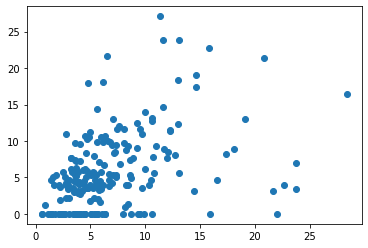

In [110]:
import numpy as np
heart = df2.loc[:,"ost종아요수"]
rating = df2.loc[:, "최고 시청률"]
before_rating = df2.loc[:,"이전작 최고 시청률"]
#np_heart = np.array(heart)
#np_rating = np.array(rating)

#np_min = np.min(np_heart)
#np_max = np.max(np_heart)

normal_heart = (np_heart - np_min) / (np_max - np_min)

print(normal_heart[1])
plt.scatter(rating , before_rating)
plt.show()

In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 준비
X = before_rating
y = rating

model = LinearRegression()
model.fit(X, y)

# 회귀 계수 및 절편 출력
coefficients = model.coef_
intercept = model.intercept_
print('회귀 계수:', coefficients)
print('절편:', intercept)

# 예측
new_data = {
    '이전작 최고 시청률': [25],
    'ost종아요수': [2258]
}

new_df = pd.DataFrame(new_data)
predicted = model.predict(new_df)
print('예측값:', predicted)

r2 = r2_score(y_true, predict)

print('R-squared:', r2)

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.2 21.4 11.2  9.9  3.6  4.   8.9  0.  23.9  0.   6.9  9.7  0.   5.
  4.7  8.5  5.6  7.8  3.9 12.5  7.7 11.7  4.5  2.2  7.9  7.3 13.1  0.
  7.4  1.6 10.7  8.9  8.1  5.3  9.6  9.3  5.3  5.9  1.9  3.7  8.7  9.9
  4.5  3.2  0.   4.7  5.8  7.1 11.   5.6  4.1  0.  18.1  6.2  0.   2.2
 14.4  4.4  2.2 10.5  3.4  5.8  5.3  4.   6.2  9.1  0.   4.5  9.7  5.6
  4.   6.  10.   0.  10.3  3.6 10.6  0.  18.4 17.9  0.  10.9 22.7  6.7
  4.   4.3  9.3  3.3  4.9  4.7 13.   8.4  2.8  0.   0.   2.1  8.4  3.1
  0.   3.9  0.   7.7  9.5  9.4  3.6 11.5  5.7  0.   9.9  0.   5.3  1.4
  6.2  5.7  7.   0.  12.3  3.1  7.7  4.   7.3  1.8  3.9  3.2  0.   3.9
  4.1  5.  23.8 13.   3.2  0.   4.1  5.3  0.   3.  11.6  4.6  0.   5.5
 19.1 21.7  5.  27.1  3.5  4.6  7.4 16.5  1.2  4.4 14.6  2.7 11.4  3.6
  3.4  5.4  0.   3.9  0.   0.   0.  11.6  5.4  5.2  0.   3.7  0.   0.
  0.   3.9  0.   0.   0.9  0.   4.4  7.6  5.1 14.   0.   3.8  3.4 17.4
  4.6  0.   6.3  0.   8.5  0.  12.7  0.   4.2  0.   0.   5.7  0.   0.
  0.   3.6  0.   0.  10.7 12.1  0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.